In [ ]:
from sklearn.decomposition import PCA
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
from sklearn import metrics
import scipy.io as spio
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


(369, 271, 3)


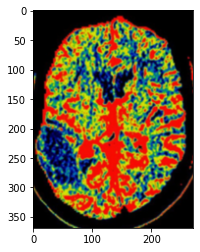

In [ ]:
#bird_small = mpimg.imread('/content/gdrive/My Drive/Colab Notebooks/ML/bird_small.png')
#bird_small = mpimg.imread('/content/gdrive/My Drive/Colab Notebooks/ML/car.jpg')

pic1 = mpimg.imread('/content/gdrive/My Drive/Colab Notebooks/ML/mrt.png')
plt.imshow(pic1)
print(pic1.shape)

[[0.01923102 0.01486111 0.04613559]
 [0.8083602  0.41276598 0.06811098]
 [0.19187848 0.4553477  0.39088023]]


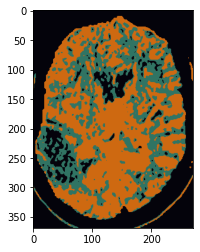

In [ ]:
rows = pic1.shape[0]
cols = pic1.shape[1]

reshaped_image = pic1.reshape(rows * cols, 3)

kmeans = KMeans(n_clusters=3)
kmeans.fit(reshaped_image)
print(kmeans.cluster_centers_)
compressed_image = kmeans.cluster_centers_[kmeans.labels_]

#compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
compressed_image = compressed_image.reshape(rows, cols, 3)
plt.imshow(compressed_image)

In [ ]:
plt.imsave('/content/gdrive/My Drive/Colab Notebooks/ML/mrt_compressed_kmeans.png', compressed_image)

99999
(99999, 3)


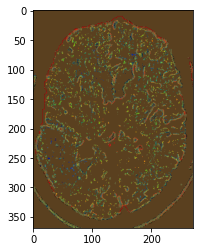

2325


In [ ]:
##################DBSCAN#########################
#d = DBSCAN(eps=0.015, min_samples=1).fit(reshaped_image)
d = DBSCAN(eps=0.01, min_samples=2).fit(reshaped_image)
labels = d.labels_
print(len(d.labels_))
clusters = [np.asarray([ind for ind, label in enumerate(d.labels_) if label == lbl]) for lbl in set(d.labels_)]
cluster_centers=np.asarray([reshaped_image[cluster].mean(axis=0) for cluster in clusters])
k = cluster_centers[d.labels_]
print(k.shape)
imgplot = plt.imshow(k.reshape(pic1.shape))
plt.show()

print(len(clusters))

In [ ]:
plt.imsave('/content/gdrive/My Drive/Colab Notebooks/ML/mrt_dbscan.png', k.reshape(pic1.shape))

In [ ]:
#Найти несколько изображений. Применить методы кластеризации для них.